# Predicting the Strength of cement from different materials properties via Multi-linear Regression

For cement industry, strength of the cement is of vital significance. Traditionally in the field of materials research. Traditionally the researchers need to implement many different experiments to find the appropriate recipe. With the development of modern machine learning technology, it is now possible to use machine learning to find the possible "excellent" recipe. This could increase the research and development of cement industry.

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

---------------------------------

Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description. 
The concrete compressive strength is the regression problem. The order of this listing 
corresponds to the order of numerals along the rows of the database. 

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable

Past Usage: 

Main
1. I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial 
neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

Others
2. I-Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of 
Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998).

3. I-Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks,"  
J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999).

4. I-Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of 
Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic 
Engineering, Vol. 15, No. 4, pp. 659-663 (2003).

5. I-Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using 
Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No. 
1, pp. 77-84 (2003).

6. Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and 
neural networks,": Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4, 
pp.597-604 ?2006?.

---------------------------------

Acknowledgements, Copyright Information, and Availability:

NOTE: Reuse of this database is unlimited with retention of copyright notice for 
Prof. I-Cheng Yeh and the following published paper:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial 
neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)

Now, let the part begin. Let us import some necessary packages first.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let us read the table and read the columns of the table, the head of the table and shape of the table first.

In [10]:
print (df.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [5]:
df=pd.read_excel("C:/Users/wrm/Desktop/cement-analysis/Concrete_Data.xls")
print (df.head())
print ("df.shape:",df.shape)

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

Let us start the basic statistical description towards the df-dataset(The cement dataset, we will call this as df in the later part). Here we will simply use the pandas.describe function.

In [6]:
print (df.describe())

       Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                

We decide not to use data-normalization to deal with the dataset as we think the dataset is not extremely large and the data-normalization process for linear model does not improve the result(It could only improve the training speed).

Here, we will read the X and the y, then use the sklearn.train_test_split to split the dataset.

In [15]:
X=df.drop(["Concrete compressive strength(MPa, megapascals) "],axis=1)
y=df["Concrete compressive strength(MPa, megapascals) "]
from sklearn.model_selection import train_test_split
print (X.head())
print (y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

In [16]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(690, 8)
(690,)
(340, 8)
(340,)


In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print (reg.score(X_test,y_test))
print (reg.coef_)
print (reg.intercept_)

0.5969665653519132
[ 0.12266899  0.11380286  0.08945039 -0.09049113  0.42695496  0.02789495
  0.03551041  0.11547321]
-57.89299643523111


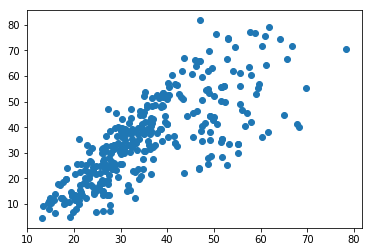

In [23]:
y_predict=reg.predict(X_test)
plt.scatter(y_predict,y_test)

In the graph, the y-label is the predicted result and the x-label is the original result. We could notice that this graph is approximately an "y=x" line. That means our fitting towards the dataset is meaningful. We could use this simple model to predict the strength of the cement.